In [7]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')
from IPython.display import display, HTML

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nazar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Instagram Sentiment Analysis

In [19]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Load Instagram data
instagram_data = pd.read_csv("IPL Fan Engagement Analysis Data\instagram_data.csv")

# Function to calculate sentiment score
def get_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to Instagram captions
instagram_data['Sentiment'] = instagram_data['Caption'].apply(get_sentiment)

# Display the updated DataFrame with sentiment scores


# Save the updated DataFrame with sentiment scores to a new CSV file
instagram_data.to_csv('instagram_data_with_sentiment.csv', index=False)

# Print DataFrame as HTML
html_table = instagram_data.to_html()
display(HTML(html_table))

## Twitter Sentiment Analysis

In [20]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Load Twitter data
twitter_data = pd.read_csv(r"IPL Fan Engagement Analysis Data\twitter_data.csv")

# Function to calculate sentiment score
def get_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to Twitter text
twitter_data['Sentiment'] = twitter_data['Text'].apply(get_sentiment)

# Save the updated DataFrame with sentiment scores to a new CSV file
twitter_data.to_csv('twitter_data_with_sentiment.csv', index=False)

# Display the updated DataFrame with sentiment scores
# Print DataFrame as HTML
html_table = twitter_data.to_html()
display(HTML(html_table))

## Combined Sentiment Scores 

In [36]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import HTML, display

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Load Instagram data with sentiment scores
instagram_data = pd.read_csv('instagram_data_with_sentiment.csv')

# Load Twitter data with sentiment scores
twitter_data = pd.read_csv('twitter_data_with_sentiment.csv')

# Aggregate Twitter sentiment scores by match date
twitter_data['TimeStamp'] = pd.to_datetime(twitter_data['TimeStamp'])
twitter_agg = twitter_data.groupby('TimeStamp').agg({
    'Sentiment': 'mean',
    'Replies': 'sum',
    'Retweets': 'sum',
    'Likes': 'sum'
}).reset_index()
twitter_agg.rename(columns={'TimeStamp': 'Match_date'}, inplace=True)

# Normalize likes and comments from Instagram data
instagram_data['Engagement_Score'] = (instagram_data['Likes'] + instagram_data['Comments']) / (instagram_data['Likes'].max() + instagram_data['Comments'].max())

# Calculate mean engagement score for Instagram data
overall_instagram_engagement = instagram_data['Engagement_Score'].mean()

# Combine Twitter sentiment with Instagram engagement score
twitter_agg['Overall_Engagement'] = twitter_agg['Sentiment'] + overall_instagram_engagement

# Classify sentiment scores
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification to both Twitter and Instagram data
twitter_agg['Sentiment_Category'] = twitter_agg['Sentiment'].apply(classify_sentiment)
instagram_data['Sentiment_Category'] = instagram_data['Sentiment'].apply(classify_sentiment)

# Save the combined sentiment scores with categories
twitter_agg.to_csv('combined_sentiment_scores.csv', index=False)
instagram_data.to_csv('instagram_data_with_sentiment_category.csv', index=False)

# Display the combined sentiment scores as an HTML table
html_table = twitter_agg.to_html()
display(HTML(html_table))

# Optional: display Instagram data as well
html_table_instagram = instagram_data.to_html()
display(HTML(html_table_instagram))


### Redefining Tables:

In [39]:
import pandas as pd
from IPython.display import display, HTML

# Load Data
df_ipl_attendance = pd.read_csv(r"IPL Fan Engagement Analysis Data\ipl_attendance.csv")
df_ipl_viewership = pd.read_csv(r"IPL Fan Engagement Analysis Data\ipl_viewership.csv")

# Merge the tables on 'match_date' and 'teams'
df_fan_engagement_metrics = df_ipl_attendance.merge(df_ipl_viewership, on=['Match Date', 'Teams'])

html_table = df_fan_engagement_metrics.to_html(index = False)
display(HTML(html_table))

df_fan_engagement_metrics.to_csv('fan_engagement_metrics.csv', index = False)

### Modifying Tables

In [47]:
import numpy as np
import pandas as pd 
import re 
from IPython.display import display, HTML

# Load data
player_stats = pd.read_csv(r"IPL Fan Engagement Analysis Data\player_stats_in_critical_moments.csv")
fan_engagement = pd.read_csv(r"IPL Fan Engagement Analysis Data\fan_engagement_metrics.csv")
critical_moments = pd.read_csv(r"IPL Fan Engagement Analysis Data\critical_moments_in_ipl.csv")
sentiment_scores = pd.read_csv(r"IPL Fan Engagement Analysis Data\combined_sentiment_scores.csv")

In [33]:
# Remove asterisks
player_stats['Team'] = player_stats['Team'].str.replace('*', '')
player_stats.fillna("", inplace=True)

html_table = player_stats.to_html()
display(HTML(html_table))

player_stats.to_csv('player_stats_in_critical_moments.csv', index = False)

C:\Users\nazar\AppData\Local\Temp\ipykernel_19640\2874360259.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  player_stats['Team'] = player_stats['Team'].str.replace('*', '')


#### changing dtypes

In [48]:
print(player_stats.dtypes)
print(fan_engagement.dtypes)
print(critical_moments.dtypes)
print(sentiment_scores.dtypes)

Player Name                  object
Team                         object
Match ID                      int64
Season                        int64
Teams                        object
Key Role                     object
Contribution Description     object
Outcome                      object
Impact Rating               float64
dtype: object
Match Date                  object
Teams                       object
Venue                       object
Capacity                     int64
Attendance                   int64
Att %                       object
Views on Jio Cinema         object
Views on Disney+ Hotstar    object
Peak Viewership             object
dtype: object
Match ID             int64
Season               int64
Match Date          object
Venue               object
Teams               object
Outcome             object
Match Situation     object
Players Involved    object
dtype: object
Match_date             object
Sentiment             float64
Replies                object
Retweets     

In [49]:
player_stats= player_stats.astype(str)
fan_engagement = fan_engagement.astype(str)
critical_moments = critical_moments.astype(str)
sentiment_scores = sentiment_scores.astype(str)

In [50]:
print(player_stats.dtypes)
print(fan_engagement.dtypes)
print(critical_moments.dtypes)
print(sentiment_scores.dtypes)

Player Name                 object
Team                        object
Match ID                    object
Season                      object
Teams                       object
Key Role                    object
Contribution Description    object
Outcome                     object
Impact Rating               object
dtype: object
Match Date                  object
Teams                       object
Venue                       object
Capacity                    object
Attendance                  object
Att %                       object
Views on Jio Cinema         object
Views on Disney+ Hotstar    object
Peak Viewership             object
dtype: object
Match ID            object
Season              object
Match Date          object
Venue               object
Teams               object
Outcome             object
Match Situation     object
Players Involved    object
dtype: object
Match_date            object
Sentiment             object
Replies               object
Retweets              obj

#### changing Match Date format

In [59]:
# Ensure 'Match Date' column exists and is referenced correctly
if 'Match Date' in fan_engagement.columns:
    # Preprocess the 'Match Date' column
    def preprocess_date(date_str):
        # Split by ' - ' to remove the time part
        date_part = date_str.split(' - ')[0]
        # If the date has a comma, split and take the second part
        if ',' in date_part:
            date_part = date_part.split(',')[1].strip()
        return date_part

    # Apply the preprocessing function
    fan_engagement['Match Date'] = fan_engagement['Match Date'].apply(preprocess_date)

    # Convert 'Match Date' to datetime format
    fan_engagement['Match Date'] = pd.to_datetime(fan_engagement['Match Date'], errors='coerce')

    # Format the 'Match Date' to a shorter version
    fan_engagement['Match Date'] = fan_engagement['Match Date'].dt.strftime('%Y-%m-%d')

    # Display the DataFrame to confirm changes
    print(fan_engagement)
else:
    print("Column 'Match Date' not found")

# Display the DataFrame
html_table = fan_engagement.to_html()
display(HTML(html_table))

fan_engagement.to_csv('fan_engagement_metrics.csv', index = False)

    Match Date        Teams  \
0   2021-10-15   CSK vs KKR   
1   2021-10-11   RCB vs KKR   
2   2021-09-26    RCB vs MI   
3   2021-04-29    DC vs KKR   
4   2022-05-29     GT vs RR   
5   2022-05-27    RR vs RCB   
6   2022-05-21     MI vs DC   
7   2022-05-05    DC vs SRH   
8   2022-05-06     GT vs MI   
9   2023-05-29    GT vs CSK   
10  2023-05-26     GT vs MI   
11  2023-04-30     MI vs RR   
12  2023-05-20    DC vs CSK   
13  2023-05-13   SRH vs LSG   
14  2023-05-21    RCB vs GT   
15  2024-04-07     MI vs DC   
16  2024-04-25   SRH vs RCB   
17  2024-05-19  SRH vs PBKS   
18  2024-04-22     RR vs MI   
19  2024-03-23   KKR vs SRH   
20  2024-04-23   CSK vs LSG   
21  2024-04-13   PBKS vs RR   
22  2024-04-15   RCB vs SRH   
23  2024-04-14    MI vs CSK   
24  2024-05-18   RCB vs CSK   
25  2024-04-07    LSG vs GT   
26  2024-04-16    KKR vs RR   
27  2024-04-11    MI vs RCB   
28  2024-04-29    KKR vs DC   
29  2024-05-12    CSK vs RR   
30  2023-04-30  CSK vs PBKS   
31  2023

In [61]:
# Ensure 'Match Date' column exists and is referenced correctly
if 'Match Date' in critical_moments.columns:
    # Preprocess the 'Match Date' column
    def preprocess_date(date_str):
        # Split by ' - ' to remove the time part
        date_part = date_str.split(' - ')[0]
        # If the date has a comma, split and take the second part
        if ',' in date_part:
            date_part = date_part.split(',')[1].strip()
        return date_part

    # Apply the preprocessing function
    critical_moments['Match Date'] = critical_moments['Match Date'].apply(preprocess_date)

    # Convert 'Match Date' to datetime format
    critical_moments['Match Date'] = pd.to_datetime(critical_moments['Match Date'], errors='coerce')

    # Format the 'Match Date' to a shorter version
    critical_moments['Match Date'] = critical_moments['Match Date'].dt.strftime('%Y-%m-%d')

    # Display the DataFrame to confirm changes
    print(critical_moments)
else:
    print("Column 'Match Date' not found")

# Display the DataFrame
html_table = critical_moments.to_html()
display(HTML(html_table))

critical_moments.to_csv('critical_moments_in_ipl.csv', index = False)

   Match ID Season  Match Date  \
0         1   2021  2021-10-15   
1         2   2021  2021-10-11   
2         3   2021  2021-09-26   
3         4   2021  2021-04-29   
4         5   2022  2022-05-29   
5         6   2022  2022-05-27   
6         7   2022  2022-05-21   
7         8   2022  2022-05-05   
8         9   2022  2022-05-06   
9        10   2023  2023-05-29   
10       11   2023  2023-05-26   
11       12   2023  2023-04-30   
12       13   2023  2023-05-20   
13       14   2023  2023-05-13   
14       15   2023  2023-05-21   
15       16   2024  2024-04-07   
16       17   2024  2024-04-25   
17       18   2024  2024-05-19   
18       19   2024  2024-04-22   
19       20   2024  2024-03-23   
20       21   2024  2024-04-23   
21       22   2024  2024-04-13   
22       23   2024  2024-04-15   
23       24   2024  2024-04-14   
24       25   2024  2024-05-18   
25       26   2024  2024-04-07   
26       27   2024  2024-04-16   
27       28   2024  2024-04-11   
28       29   

# Exploratory Data Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load data
player_stats = pd.read_csv(r"IPL Fan Engagement Analysis Data\player_stats_in_critical_moments.csv")
fan_engagement = pd.read_csv(r"IPL Fan Engagement Analysis Data\fan_engagement_metrics.csv")
critical_moments = pd.read_csv(r"IPL Fan Engagement Analysis Data\critical_moments_in_ipl.csv")
sentiment_scores = pd.read_csv(r"IPL Fan Engagement Analysis Data\combined_sentiment_scores.csv")

## Player and Match Performance Analysis

### 1. Player Impact Analysis

#### (i). Bar Chart: Average Impact Rating by Player

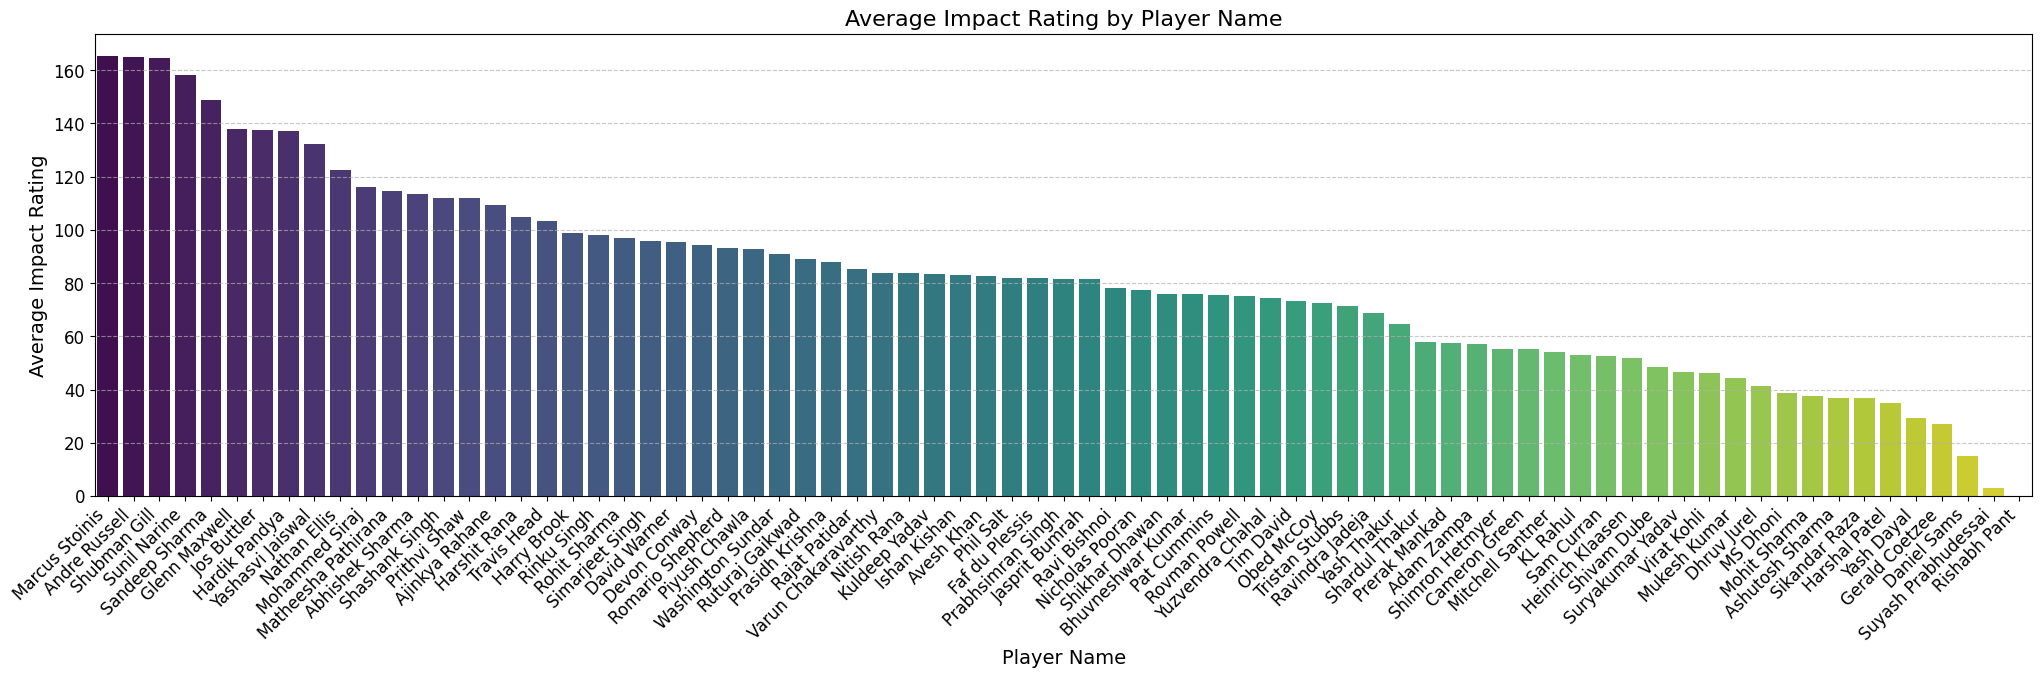

In [3]:
# Calculate the average impact rating by player name
avg_impact_rating = player_stats.groupby('Player Name')['Impact Rating'].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(25, 6))
sns.barplot(x=avg_impact_rating.index, y=avg_impact_rating.values, palette='viridis')
plt.title('Average Impact Rating by Player Name', fontsize=16)
plt.xlabel('Player Name', fontsize=14)
plt.ylabel('Average Impact Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### (ii). Heatmap: Player Impact Rating across different seasons

In [4]:
# Pivot the data to get seasons as columns and players as rows
heatmap_data = player_stats.pivot_table(index='Player Name', columns='Season', values='Impact Rating')

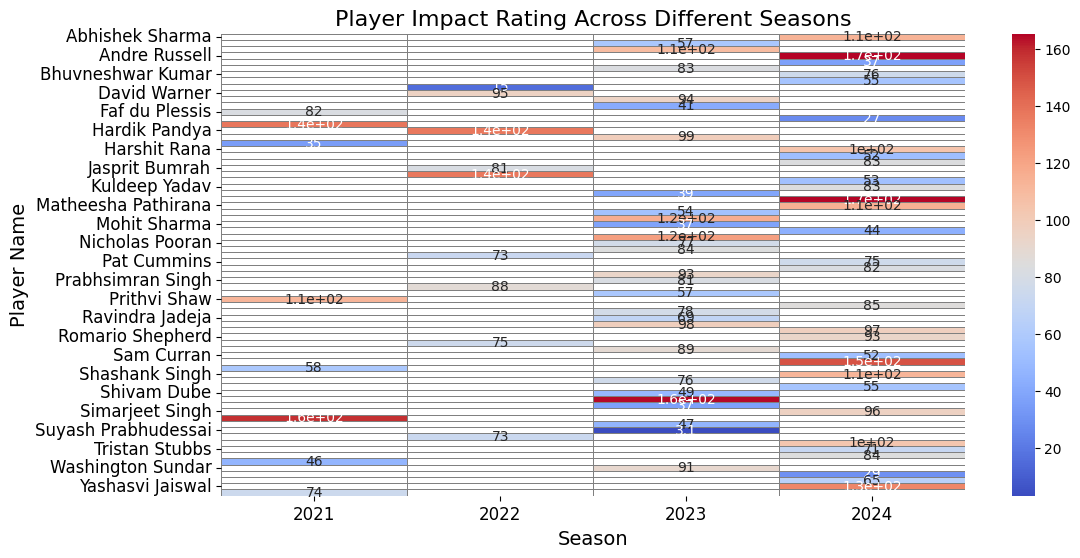

In [5]:
# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='grey')
plt.title('Player Impact Rating Across Different Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Player Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 2. Team Performance in Critical Moments

#### (i) Stacked Bar Chart: Total Contributions and Impact Rating per team across different seasons

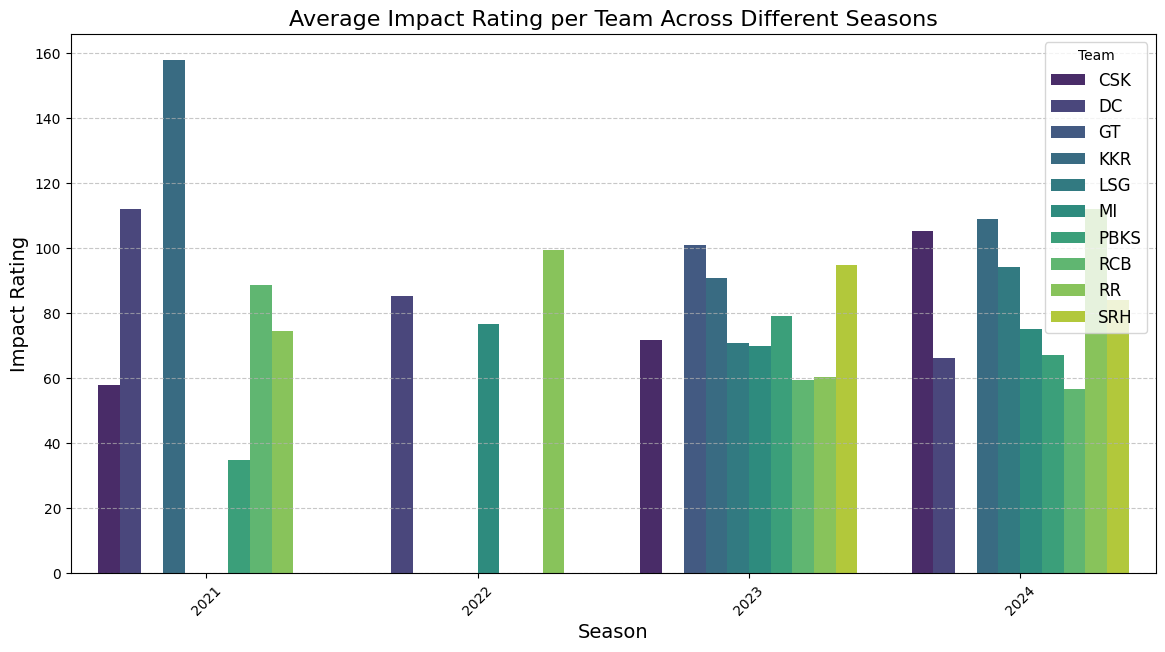

In [6]:
# Aggregating the data
aggregated_data = player_stats.groupby(['Team', 'Season'])['Impact Rating'].mean().reset_index()

# Plotting the stacked bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=aggregated_data, x='Season', y='Impact Rating', hue='Team', palette='viridis')

# Adding titles and labels
plt.title('Average Impact Rating per Team Across Different Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Impact Rating', fontsize=14)
plt.legend(title='Team', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### (ii) Pie Chart: Distribution of Key Roles (batsman, bowler, all-rounder) across different teams

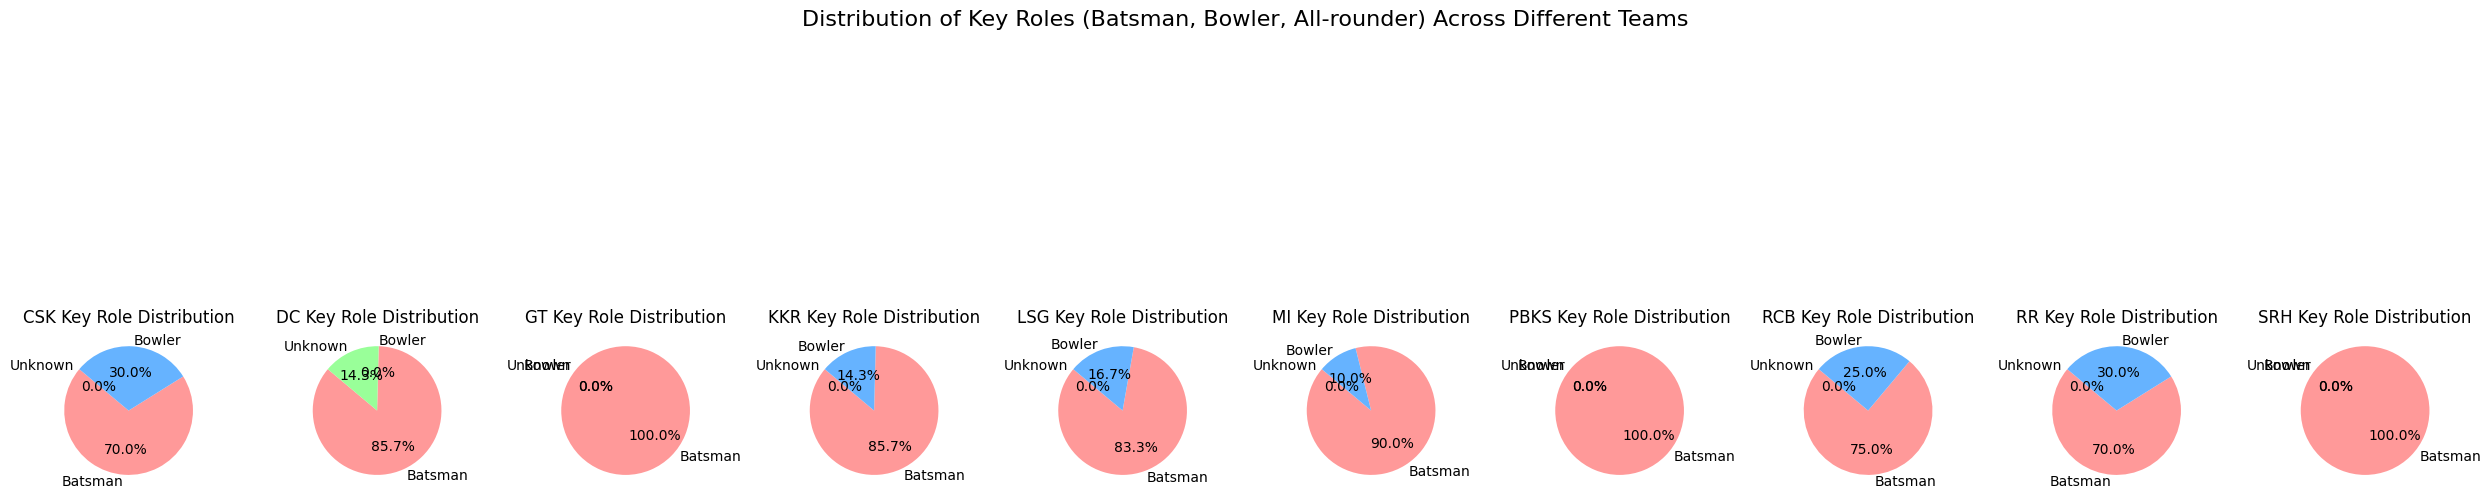

In [7]:
# Aggregating the data
role_distribution = player_stats.groupby(['Team', 'Key Role']).size().unstack(fill_value=0)

# Plotting the pie charts
fig, axes = plt.subplots(1, len(role_distribution), figsize=(25, 8))

for i, team in enumerate(role_distribution.index):
    axes[i].pie(role_distribution.loc[team], labels=role_distribution.columns, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
    axes[i].set_title(f'{team} Key Role Distribution')

# Adding a main title
fig.suptitle('Distribution of Key Roles (Batsman, Bowler, All-rounder) Across Different Teams', fontsize=16)
plt.tight_layout()
plt.show()

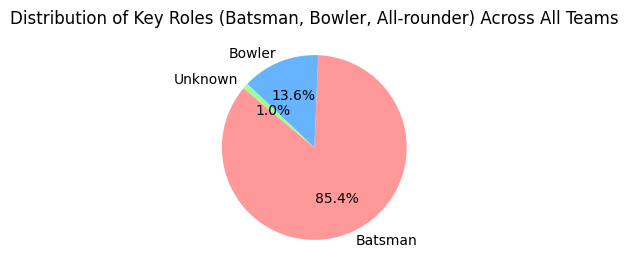

In [8]:
# Aggregating the data
role_distribution = player_stats['Key Role'].value_counts()

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(role_distribution, labels=role_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('Distribution of Key Roles (Batsman, Bowler, All-rounder) Across All Teams')

plt.show()

## Fan Engagement Analysis

### 3. Match Attendance and Venue Capacity 

#### (i). Scatter Plot: Attendance vs. Venue Capacity

In [9]:
# Plotting the scatter plot with Plotly
fig = px.scatter(fan_engagement, x='Capacity', y='Attendance', 
                 hover_data=['Venue', 'Match Date', 'Teams'], 
                 title='Attendance vs. Capacity', 
                 labels={'capacity': 'Capacity', 'attendance': 'Attendance'},
                 color_discrete_sequence=['mediumpurple'])  

fig.show()

#### (ii). Line Chart: Attendance Percentage over different seasons

In [10]:
# Extracting seasons from match dates
fan_engagement['Season'] = fan_engagement['Match Date'].str[:4]

# Preprocessing Att % to remove percentage symbol and convert to float
fan_engagement['Att %'] = fan_engagement['Att %'].str.rstrip('%').astype(float)

# Grouping by season and calculating average attendance percentage
season_att_percentage = fan_engagement.groupby('Season')['Att %'].mean()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(season_att_percentage.index, season_att_percentage.values, marker='o', color='blue', linestyle='-')

# Adding titles and labels
plt.title('Attendance Percentage Over Different Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Att %', fontsize=14)
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print(fan_engagement.columns)

Index(['Match Date', 'Teams', 'Venue', 'Capacity', 'Attendance', 'Att %',
       'Views on Jio Cinema', 'Views on Disney+ Hotstar', 'Peak Viewership',
       'Season'],
      dtype='object')


### 4. Viewership Trends

#### (i). Line Chart: Views on Jio Cinema and Disney+ Hotstar over time

In [12]:
# Convert dtype to object
fan_engagement['Views on Jio Cinema'] = fan_engagement['Views on Jio Cinema'].astype(str)
fan_engagement['Views on Disney+ Hotstar'] = fan_engagement['Views on Disney+ Hotstar'].astype(str)

# Remove ' Cr' suffix using lambda function
fan_engagement['Views on Jio Cinema'] = fan_engagement['Views on Jio Cinema'].apply(lambda x: x.replace(' Cr', ''))
fan_engagement['Views on Disney+ Hotstar'] = fan_engagement['Views on Disney+ Hotstar'].apply(lambda x: x.replace(' Cr', ''))

# Extracting seasons from match dates
fan_engagement['season'] = fan_engagement['Match Date'].str[:4]

# Convert columns to numeric
fan_engagement['Views on Jio Cinema'] = pd.to_numeric(fan_engagement['Views on Jio Cinema'])
fan_engagement['Views on Disney+ Hotstar'] = pd.to_numeric(fan_engagement['Views on Disney+ Hotstar'])

# Grouping by season and calculating the mean views
season_views = fan_engagement.groupby('season')[['Views on Jio Cinema', 'Views on Disney+ Hotstar']].mean()

# Reset index to convert the groupby object to a DataFrame
season_views.reset_index(inplace=True)

# Plotting the line chart
fig = px.line(season_views.melt(id_vars='season'), 
              x='season', y='value', color='variable',
              title='Viewership Over Time', 
              labels={'season': 'Season', 'value': 'Views', 'variable': 'Platform'})

# Show the plot
fig.show()

#### (ii). Histogram: Peak Viewership per match

In [13]:
# Convert dtype to object and remove ' Cr' suffix for peak viewership
fan_engagement['Peak Viewership'] = fan_engagement['Peak Viewership'].astype(str).apply(lambda x: x.replace(' Cr', ''))

# Merge with critical moments data
merged_data = pd.merge(fan_engagement, critical_moments, on='Match Date')

# Create a histogram with Plotly
fig = px.histogram(merged_data, x='Peak Viewership', nbins=20, title='Distribution of Peak Viewership per Match')

# Update layout to show hover information
fig.update_layout(hovermode='closest',
                  hoverlabel=dict(bgcolor='white', font_size=12),
                  xaxis_title='Peak Viewership(Crores)',
                  yaxis_title='Frequency')

# Show the plot
fig.show()

#### (iii). Heatmap: Viewership (both platforms) by venue

In [14]:
merged_data = pd.merge(fan_engagement, critical_moments, on='Venue')


# Create the heatmap using Plotly
fig = px.imshow(merged_data.pivot_table(index='Venue', values=['Views on Jio Cinema', 'Views on Disney+ Hotstar'], aggfunc='sum'),
                labels=dict(x="Platform", y="Venue", color="Viewership"),
                origin='lower',  # Adjust origin to 'lower' to match pandas pivot_table behavior
                aspect='auto',  # Ensure aspect ratio is adjusted automatically
                zmin=0)         # Set minimum value to 0 for better visualization

# Customize the layout
fig.update_layout(title='Viewership Heatmap by Venue',
                  xaxis_title='Platform',
                  yaxis_title='Venue',
                  coloraxis_colorbar=dict(title='Viewership'))

# Show the plot
fig.show()


In [15]:
import plotly.graph_objects as go

merged_data = pd.merge(fan_engagement, critical_moments, on='Venue')

# Create grouped bar chart
fig = go.Figure()

# Add bar trace for Jio Cinema
fig.add_trace(go.Bar(
    x=merged_data['Venue'],
    y=merged_data['Views on Jio Cinema'],
    name='Jio Cinema'
))

# Add bar trace for Disney+ Hotstar
fig.add_trace(go.Bar(
    x=merged_data['Venue'],
    y=merged_data['Views on Disney+ Hotstar'],
    name='Disney+ Hotstar'
))

# Update layout
fig.update_layout(barmode='group',
                  title='Viewership by Venue and Platform',
                  xaxis_title='Venue',
                  yaxis_title='Viewership')

# Show the plot
fig.show()

## Sentiment and Engagement Analysis

### 5. Sentiment vs. Engagement

#### (i). Box Plot: Overall Engagement by Sentiment Category

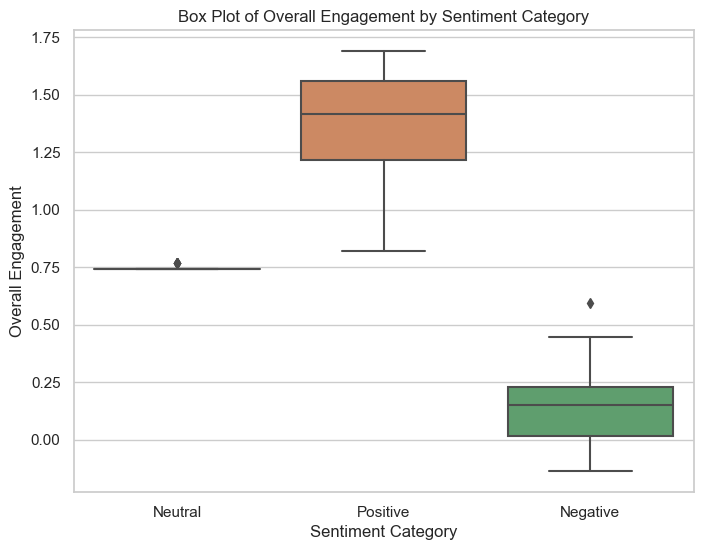

In [16]:
# Set seaborn style
sns.set(style="whitegrid")

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sentiment_Category", y="Overall_Engagement", data=sentiment_scores)

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Overall Engagement')
plt.title('Box Plot of Overall Engagement by Sentiment Category')

# Show the plot
plt.show()


In [17]:
# # Count the frequency of each match situation
# match_situation_counts = critical_moments['Match Situation'].value_counts()

# # Count the frequency of each match situation
# match_situation_counts = critical_moments['Match Situation'].value_counts().reset_index()
# match_situation_counts.columns = ['Match Situation', 'Frequency']

# # Create bar chart using Plotly
# fig = px.bar(match_situation_counts, x='Match Situation', y='Frequency', 
#              title='Frequency of Different Match Situations', 
#              labels={'Match Situation': 'Match Situation', 'Frequency': 'Frequency'})
# fig.update_traces(hovertemplate='Match Situation: %{x}<br>Frequency: %{y}')
# fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
# fig.show()

In [18]:
# # Group the data by 'match situation' and 'outcome', and count the frequency of each combination
# outcome_counts = critical_moments.groupby(['Match Situation', 'Outcome']).size().unstack(fill_value=0)

# # Plotting the stacked bar chart
# plt.figure(figsize=(12, 8))
# outcome_counts.plot(kind='bar', stacked=True)
# plt.title('Outcomes Associated with Different Match Situations')
# plt.xlabel('Match Situation')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

## Combined Analysis

### 6. Player Contribution vs. Match Attendance

#### (i). Scatter Plot: Player Impact Rating vs. Attendance Percentage

In [19]:
merged_data = pd.merge(player_stats, fan_engagement, on='Teams')

# # Plotting the scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(merged_data['Impact Rating'], merged_data['Att %'])
# plt.title('Impact Rating vs. Att %')
# plt.xlabel('Impact Rating')
# plt.ylabel('Attendance Percentage')
# plt.grid(True)  # Add grid for better readability
# plt.show()

# Plotting the scatter plot with Plotly
fig = px.scatter(merged_data, x='Impact Rating', y='Att %', hover_data=['Player Name', 'Team'])
fig.update_layout(title='Impact Rating vs. Att %',
                  xaxis_title='Impact Rating',
                  yaxis_title='Attendance Percentage',
                  hovermode='closest')  # Set hovermode to 'closest' for better hover interaction
fig.show()

#### (ii). Violin Plot: Player Impact Rating across different venues

In [20]:
# Merge the dataframes on a common column, such as 'Teams'
merged_data = pd.merge(player_stats, fan_engagement, on='Teams')

# # Pivot the merged dataframe to get Impact Rating of players across different venues
# heatmap_data = merged_data.pivot_table(index='Player Name', columns='Venue', values='Impact Rating')

# # Create the heatmap trace
# heatmap_trace = go.Heatmap(z=heatmap_data.values,
#                            x=heatmap_data.columns,
#                            y=heatmap_data.index,
#                            hoverongaps=False,
#                            colorscale='Viridis')

# # Create the layout
# layout = go.Layout(title="Impact Rating of Players Across Different Venues",
#                    xaxis=dict(title='Venue'),
#                    yaxis=dict(title='Player Name'))

# # Create the figure
# fig = go.Figure(data=[heatmap_trace], layout=layout)
# fig.show()

# Create the violin plot using Plotly Express
fig = px.violin(merged_data, x='Venue', y='Impact Rating',
                title='Distribution of Impact Ratings Across Venues',
                box=True,  # Include box plot inside violin
                points='all',  # Show all data points
                hover_data={'Venue': False, 'Impact Rating': ':.2f'})  # Customize hover data

# Show the plot
fig.show()

### 7. Team Performance vs. Fan Engagement

#### (i). Bubble Chart: Team Performance (total impact rating) vs. Average Attendance, with bubble size representing viewership

In [21]:
# Merge the dataframes on a common column, such as 'Teams'
merged_data = pd.merge(player_stats, fan_engagement, on='Teams')

# Aggregate player Impact Rating by team
team_performance = player_stats.groupby('Team')['Impact Rating'].sum().reset_index()

# Calculate average attendance by team
average_attendance = merged_data.groupby('Team')['Attendance'].mean().reset_index()

# Calculate peak viewership by team 
peak_viewership = merged_data.groupby('Team')['Peak Viewership'].max().reset_index()

# Merge team performance and average attendance data
merged_data = pd.merge(team_performance, average_attendance, on='Team')
merged_data = pd.merge(merged_data, peak_viewership, on='Team')

# Convert columns to numeric
merged_data['Impact Rating'] = pd.to_numeric(merged_data['Impact Rating'], errors='coerce')
merged_data['Attendance'] = pd.to_numeric(merged_data['Attendance'], errors='coerce')
merged_data['Peak Viewership'] = pd.to_numeric(merged_data['Peak Viewership'], errors='coerce')

# Increase the bubble size by multiplying 'Peak Viewership' by a factor
bubble_size_factor = 100  # Adjust this factor as needed
merged_data['Bubble Size'] = merged_data['Peak Viewership'] * bubble_size_factor

# Create the bubble chart using Plotly Express
fig = px.scatter(merged_data, x='Impact Rating', y='Attendance', size='Peak Viewership',
                 hover_name='Team', log_x=True, log_y=True,
                 title='Team Performance vs. Average Attendance (Bubble Size: Peak Viewership(Crores))',
                 labels={'Impact Rating': 'Total Impact Rating', 'Attendance': 'Average Attendance',
                         'Peak Viewership': 'Peak Viewership'})

# Show the plot
fig.show()

## Temporal Analysis

### 8. Seasonal Trends in Performance and Engagement

#### (i). Bar Plot: Average Impact Rating per season

In [22]:
# # Aggregate player Impact Rating by team and season
# team_performance = player_stats.groupby(['Season', 'Team'])['Impact Rating'].sum().reset_index()

# # Grouping the data by season and calculating the average Impact Rating per season
# average_team_impact_rating = team_performance.groupby('Season')['Impact Rating'].mean().reset_index()

# # Plotting the line chart using Plotly Express
# fig = px.line(average_team_impact_rating, x='Season', y='Impact Rating', 
#               title='Average Impact Rating of Teams per Season',
#               labels={'Season': 'Season', 'Impact Rating': 'Average Impact Rating'})
# fig.show()

# # Aggregate player Impact Rating by team
# team_performance = player_stats.groupby('Team')['Impact Rating'].sum().reset_index()

# # Grouping the data by season and calculating the cumulative Impact Rating per season
# cumulative_impact_rating = player_stats.groupby('Season')['Impact Rating'].cumsum()

# # Add the cumulative Impact Rating to the original DataFrame
# player_stats['Cumulative Impact Rating'] = cumulative_impact_rating

# # Plotting the area chart using Plotly Express
# fig = px.area(player_stats, x='Season', y='Cumulative Impact Rating', color='Team',
#               title='Cumulative Impact Rating of Teams Over Seasons',
#               labels={'Season': 'Season', 'Cumulative Impact Rating': 'Cumulative Impact Rating'})
# fig.show()

# Aggregate player Impact Rating by team
team_performance = player_stats.groupby('Team')['Impact Rating'].sum().reset_index()

# Grouping the data by season and calculating the cumulative Impact Rating per season
cumulative_impact_rating = player_stats.groupby('Season')['Impact Rating'].cumsum()

# Add the cumulative Impact Rating to the original DataFrame
player_stats['Cumulative Impact Rating'] = cumulative_impact_rating

# Calculate the total cumulative Impact Rating per team for each season
team_cumulative_rating = player_stats.groupby(['Team', 'Season'])['Cumulative Impact Rating'].max().reset_index()

# Plotting the bar chart using Plotly Express
fig = px.bar(team_cumulative_rating, x='Season', y='Cumulative Impact Rating', color='Team',
             title='Cumulative Impact Rating of Teams Over Seasons',
             labels={'Season': 'Season', 'Cumulative Impact Rating': 'Cumulative Impact Rating'},
             barmode='group')
fig.show()

#### (ii). Heatmap: Engagement Metrics (Attendance, Viewership) over seasons

In [23]:
# Extracting seasons from match dates
fan_engagement['Season'] = fan_engagement['Match Date'].str[:4]

# Plotting the line chart using Plotly Express
fig = px.line(fan_engagement, x='Season', y=['Attendance', 'Views on Jio Cinema', 'Views on Disney+ Hotstar'],
              title='Engagement Metrics Over Season',
              labels={'Season': 'Season', 'value': 'Count', 'variable': 'Metric'},
              color_discrete_map={'Attendance': 'blue', 'Views on Jio Cinema': 'green', 'Views on Disney+ Hotstar': 'red'})
fig.show()

# Plotting the area chart using Plotly Express
fig = px.area(fan_engagement, x='Season', y=['Attendance', 'Views on Jio Cinema', 'Views on Disney+ Hotstar'],
              title='Engagement Metrics Over Season',
              labels={'Season': 'Season', 'value': 'Count', 'variable': 'Metric'},
              color_discrete_map={'Attendance': 'blue', 'Views on Jio Cinema': 'green', 'Views on Disney+ Hotstar': 'red'})
fig.show()



In [24]:
# Extracting seasons from match dates
fan_engagement['Season'] = fan_engagement['Match Date'].str[:4]

# Grouping the data by season and calculating the total engagement metrics
season_engagement = fan_engagement.groupby('Season')[['Attendance', 'Views on Jio Cinema', 'Views on Disney+ Hotstar']].sum().reset_index()

# Plotting the heatmap using Plotly Express
fig = px.imshow(season_engagement[['Attendance', 'Views on Jio Cinema', 'Views on Disney+ Hotstar']],
                labels=dict(x="Metrics", y="Season", color="Engagement"),
                x=['Attendance', 'Views on Jio Cinema', 'Views on Disney+ Hotstar'],
                y=season_engagement['Season'],
                title="Engagement Metrics Over Season",
                color_continuous_scale='viridis')
fig.show()

#### (iii). Heatmap: Sentiment Category across different seasons

In [25]:
# Extracting seasons from match dates
sentiment_scores['Season'] = sentiment_scores['Match_date'].str[:4]

# Plotting the heatmap using Plotly Express
fig = px.imshow(sentiment_scores.pivot_table(index='Season', columns='Sentiment_Category', aggfunc='size'),
                labels=dict(x="Sentiment Category", y="Season", color="Frequency"),
                x=sentiment_scores['Sentiment_Category'].unique(),
                y=sentiment_scores['Season'].unique(),
                title="Sentiment Scores Across Different Seasons",
                color_continuous_scale='viridis')
fig.show()

# Conduct Analysis

In [22]:
import pandas as pd

In [23]:
# Load data
player_stats = pd.read_csv(r"IPL Fan Engagement Analysis Data\player_stats_in_critical_moments.csv")
fan_engagement = pd.read_csv(r"IPL Fan Engagement Analysis Data\fan_engagement_metrics.csv")
critical_moments = pd.read_csv(r"IPL Fan Engagement Analysis Data\critical_moments_in_ipl.csv")
sentiment_scores = pd.read_csv(r"IPL Fan Engagement Analysis Data\combined_sentiment_scores.csv")

In [31]:
# Extract season from match date
fan_engagement['Season'] = fan_engagement['Match Date'].str[:4]
sentiment_scores['Season'] = sentiment_scores['Match_date'].str[:4]

# Ensure all values in columns are strings before removing suffixes and converting to float
fan_engagement['Views on Jio Cinema'] = fan_engagement['Views on Jio Cinema'].astype(str).str.replace(' Cr', '').astype(float)
fan_engagement['Views on Disney+ Hotstar'] = fan_engagement['Views on Disney+ Hotstar'].astype(str).str.replace(' Cr', '').astype(float)
fan_engagement['Peak Viewership'] = fan_engagement['Peak Viewership'].astype(str).str.replace(' Cr', '').astype(float)

# Convert 'Att %' to numeric after removing '%'
fan_engagement['Att %'] = fan_engagement['Att %'].astype(str).str.rstrip('%').astype(float)

# Merge on season
merged_engagement = pd.merge(fan_engagement, sentiment_scores, on='Season')

# Define thresholds for high and low intensity using median
metrics = ['Attendance', 'Views on Jio Cinema', 'Views on Disney+ Hotstar', 'Peak Viewership', 'Overall_Engagement']
thresholds = {metric: merged_engagement[metric].median() for metric in metrics}

# Function to classify intensity
def classify_intensity(row, thresholds):
    high_count = sum(row[metric] > thresholds[metric] for metric in metrics)
    low_count = len(metrics) - high_count
    return 'high' if high_count > low_count else 'low'

merged_engagement['Intensity'] = merged_engagement.apply(classify_intensity, axis=1, thresholds=thresholds)

# Convert 'Season' column in player_stats to object type
player_stats['Season'] = player_stats['Season'].astype(str)

# Merge all data
merged_data = pd.merge(merged_engagement, player_stats, on=['Season'])

# Check for missing values in merged_data
missing_values = merged_data.isnull().sum()

# Drop rows with missing values (if necessary)
merged_data_cleaned = merged_data.dropna()

# Extract high and low intensity impact ratings
high_intensity_ratings = merged_data_cleaned[merged_data_cleaned['Intensity'] == 'high']['Impact Rating']
low_intensity_ratings = merged_data_cleaned[merged_data_cleaned['Intensity'] == 'low']['Impact Rating']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(high_intensity_ratings, low_intensity_ratings)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 3.968075268845287
P-Value: 7.24769874868158e-05
